In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

In [ ]:
# Define Parameters
num_classes = 
img_size = 
channels = 

#### Prepare Data

cifar10 classes: https://www.cs.toronto.edu/~kriz/cifar.html

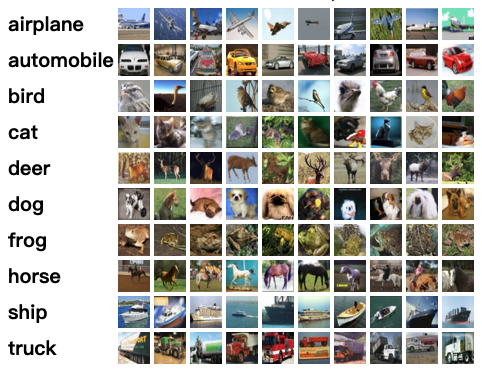

In [ ]:
# Load Data from Dataset function
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# Data shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
# Show image
idx = 1
plt.imshow(x_test[idx]), print(f'classes id: {y_test[idx]}')

In [ ]:
# Flatten img to a vector
x_train = 
x_test = 

# normalization to 0 ~ 1
x_train = 
x_test = 

# one hot encoding
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
img = x_train[0]
print(img, img.shape, y_train[0])

#### Build Model

In [ ]:
# Model 3
model3 = models.Sequential([
                            
])

In [ ]:
model.summary()

#### Training

In [ ]:
# Method 2

# Setting for training
model.compile(loss= , 
              optimizer= ,
              metrics= 
              )

In [ ]:
logs = model.fit(x_train, y_train,
                batch_size= ,
                epochs= ,
                validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'test loss: {score[0]}, test acc: {score[1]}')

In [ ]:
idx = np.random.randint(0, len(x_test))

prediction = model.predict(x_test[idx:idx+1]) # take 1 img for prediction
print('model prediction: ', prediction)
print('max probabolity index: ', np.argmax(prediction, axis=-1))
print('ground truth index: ', np.argmax(y_test[idx]))

plt.imshow(x_test[idx].reshape(img_size, img_size, channels))

In [ ]:
history = logs.history

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

#### Save & load model

In [ ]:
model.save('my_model.h5')

model = models.load_model('my_model.h5')

prediction = model.predict(x_test[:1])

#### Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = np.argmax(y_test, axis=-1) # Ground Truth
y_pred = np.argmax(model.predict(x_test), axis=-1) # Model prediction
print(y_true.shape, y_pred.shape)


In [ ]:
# Classification Report
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
label_names = [str(i) for i in range(10)] # ['0' ~  '9']
print(classification_report(y_true, y_pred, target_names=label_names))